In [114]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

In [115]:
file_path = 'netflix_titles.csv'

data = pd.read_csv(file_path)

data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [116]:
data.keys()

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [117]:
netflix = data.drop('show_id', axis=1)

In [118]:
netflix.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [119]:
netflix.count()

type            8807
title           8807
director        6173
cast            7982
country         7976
date_added      8797
release_year    8807
rating          8803
duration        8804
listed_in       8807
description     8807
dtype: int64

In [120]:
netflix.isnull().count()

type            8807
title           8807
director        8807
cast            8807
country         8807
date_added      8807
release_year    8807
rating          8807
duration        8807
listed_in       8807
description     8807
dtype: int64

In [121]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8807 non-null   object
 1   title         8807 non-null   object
 2   director      6173 non-null   object
 3   cast          7982 non-null   object
 4   country       7976 non-null   object
 5   date_added    8797 non-null   object
 6   release_year  8807 non-null   int64 
 7   rating        8803 non-null   object
 8   duration      8804 non-null   object
 9   listed_in     8807 non-null   object
 10  description   8807 non-null   object
dtypes: int64(1), object(10)
memory usage: 757.0+ KB


In [122]:
from collections import Counter

counter = Counter(netflix['type'])

counter

Counter({'Movie': 6131, 'TV Show': 2676})

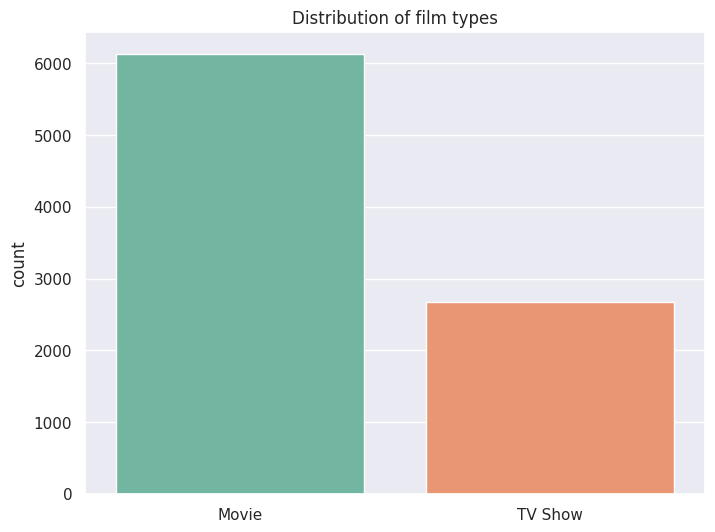

In [123]:
plt.figure(figsize=(8,6))

sns.set(style='darkgrid')

ax = sns.countplot(x=netflix['type'], data=netflix, hue=netflix['type'], palette='Set2')
plt.xlabel('')
plt.title('Distribution of film types')

plt.show()

Separating the dataframe into two based on type category

In [124]:
netflix_shows = netflix[netflix['type']=='TV Show']

netflix_shows

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
...,...,...,...,...,...,...,...,...,...,...,...
8795,TV Show,Yu-Gi-Oh! Arc-V,NaN,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada","May 1, 2018",2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...
8796,TV Show,Yunus Emre,NaN,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,"January 17, 2017",2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves..."
8797,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia","September 13, 2018",2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...
8800,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."


In [125]:
netflix_movies = netflix[netflix['type'] == 'Movie']

netflix_movies

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
...,...,...,...,...,...,...,...,...,...,...,...
8801,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


Month when least amount of content added

In [126]:
netflix_date = netflix_shows[['date_added']].dropna()

netflix_date['year'] = netflix_date['date_added'].apply(lambda x: x.split(', ')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x: x.lstrip().split(' ')[0])

netflix_date[:5]


,date_added,year,month
1,"September 24, 2021",2021,September
2,"September 24, 2021",2021,September
3,"September 24, 2021",2021,September
4,"September 24, 2021",2021,September
5,"September 24, 2021",2021,September


In [127]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]

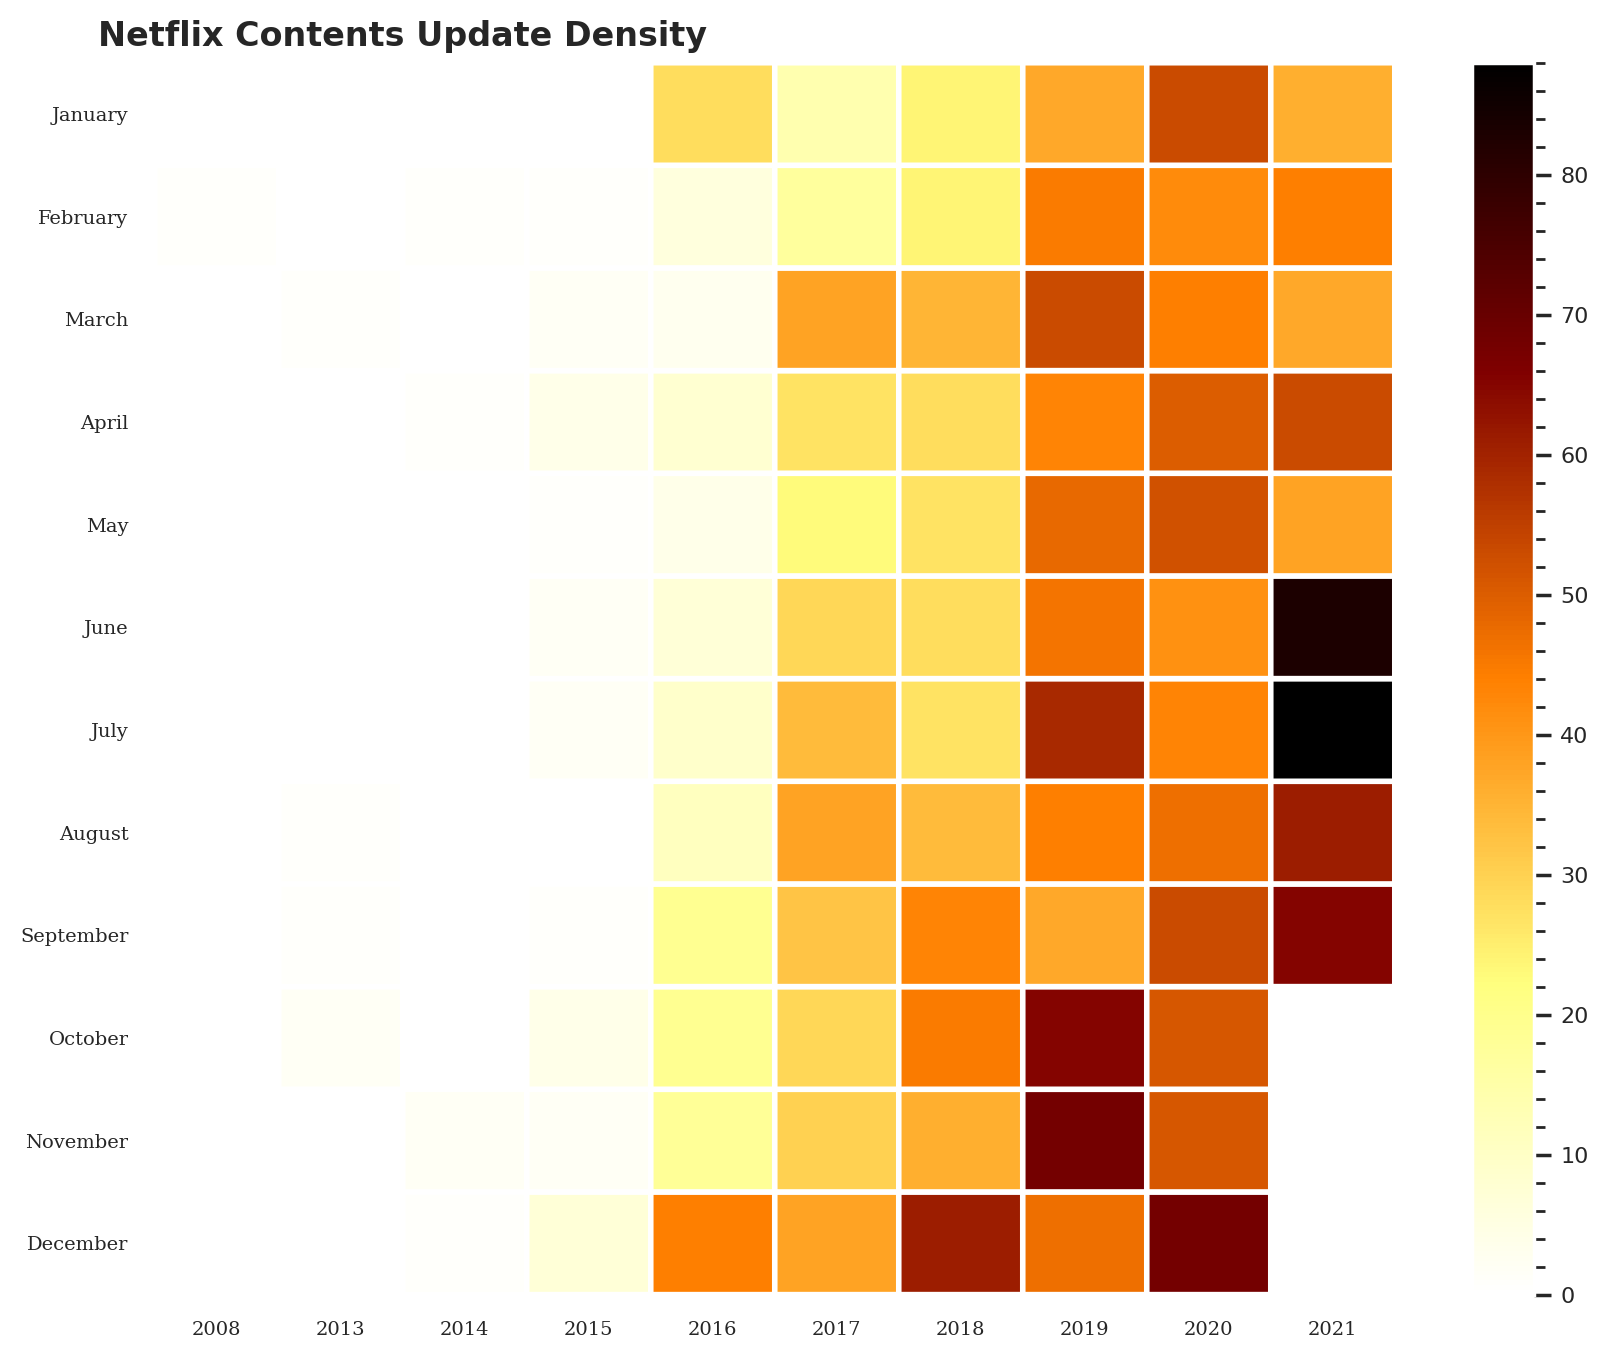

In [128]:
df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].transpose()

plt.figure(figsize=(10,8), dpi=200)
plt.pcolor(df, cmap='afmhot_r', edgecolors='white', linewidths=2)

plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(df.index), 1), df.index, fontsize=7, fontfamily='serif')

plt.title('Netflix Contents Update Density', fontsize=12, fontweight='bold', position=(0.20, 1.02))
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8)
cbar.ax.minorticks_on()
plt.show()


Movie ratings analysis

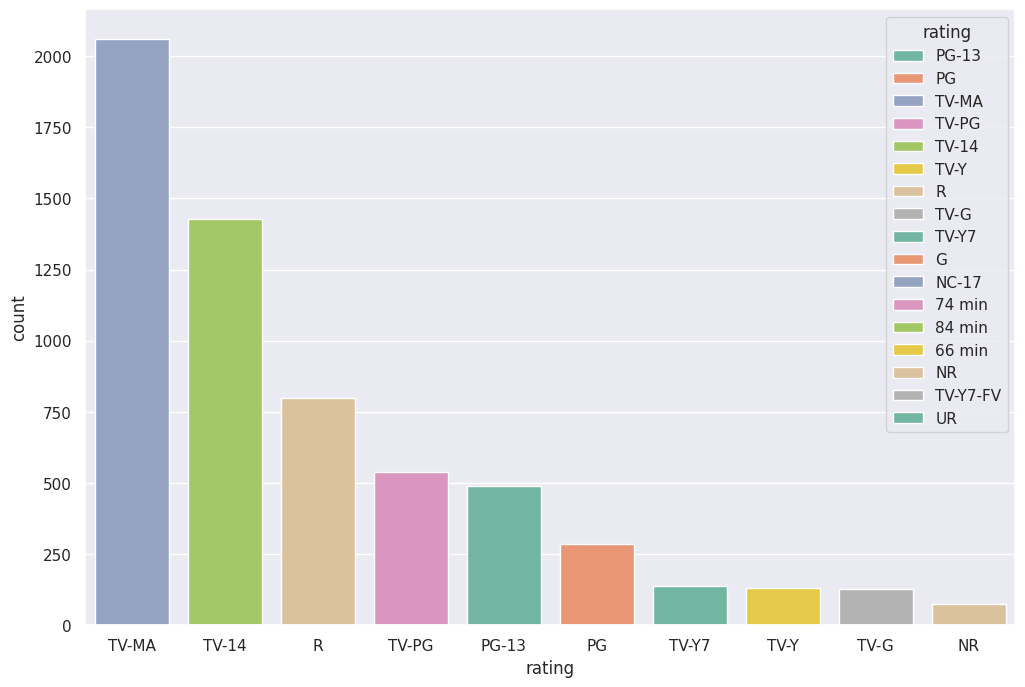

In [129]:
plt.figure(figsize=(12,8))

sns.set(style='darkgrid')
sns.countplot(x=netflix_movies['rating'], data=netflix_movies, palette="Set2", hue=netflix_movies['rating'], order=netflix_movies['rating'].value_counts().index[:10])

plt.show()

IMDB ratings to get top rated movies

In [130]:
file_path = 'IMDb_ratings.csv'

imdb_ratings = pd.read_csv(file_path, usecols=['weighted_average_vote'])

imdb_ratings

,weighted_average_vote
0,5.9
1,6.1
2,5.8
3,5.2
4,7.0
...,...
62227,7.1
62228,6.0
62229,5.9
62230,6.2


In [131]:
file_path = 'IMDb movies.csv'

imdb_titles = pd.read_csv(file_path, usecols=['title', 'year', 'genre'])

imdb_titles

<ipython-input-131-e45782e1b790>:3: DtypeWarning:

Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.



,title,year,genre
0,Miss Jerry,1894,Romance
1,The Story of the Kelly Gang,1906,"Biography, Crime, Drama"
2,Den sorte drøm,1911,Drama
3,Cleopatra,1912,"Drama, History"
4,L'Inferno,1911,"Adventure, Drama, Fantasy"
...,...,...,...
85850,Le lion,2020,Comedy
85851,De Beentjes van Sint-Hildegard,2020,"Comedy, Drama"
85852,Padmavyuhathile Abhimanyu,2019,Drama
85853,Sokagin Çocuklari,2019,"Drama, Family"


In [132]:
ratings = pd.DataFrame({
    'Title': imdb_titles.title,
    'Release Year': imdb_titles.year,
    'Rating': imdb_ratings.weighted_average_vote,
    'Genre': imdb_titles.genre})

ratings

,Title,Release Year,Rating,Genre
0,Miss Jerry,1894,5.9,Romance
1,The Story of the Kelly Gang,1906,6.1,"Biography, Crime, Drama"
2,Den sorte drøm,1911,5.8,Drama
3,Cleopatra,1912,5.2,"Drama, History"
4,L'Inferno,1911,7.0,"Adventure, Drama, Fantasy"
...,...,...,...,...
85850,Le lion,2020,NaN,Comedy
85851,De Beentjes van Sint-Hildegard,2020,NaN,"Comedy, Drama"
85852,Padmavyuhathile Abhimanyu,2019,NaN,Drama
85853,Sokagin Çocuklari,2019,NaN,"Drama, Family"


In [133]:
ratings.drop_duplicates(subset=['Title', 'Release Year', 'Rating'], inplace=True)

ratings.shape

(85802, 4)

In [134]:
ratings.dropna()

joint_data = ratings.merge(netflix, left_on='Title', right_on='title', how='inner')

joint_data=joint_data.sort_values(by='Rating', ascending=False)

In [135]:
import plotly.express as px

top_rated = joint_data[:10]
fig = px.sunburst(
    top_rated,
    path=['title', 'country'],
    values='Rating',
    color='Rating'
)

fig.show()

Countries with highest rated content

In [136]:
country_count = joint_data['country'].value_counts().sort_values(ascending=False)

country_count = pd.DataFrame(country_count)

country_count[:11]

,count
country,
United States,860
India,712
United Kingdom,119
Canada,57
Philippines,50
Spain,40
South Korea,38
Indonesia,38
France,37


In [137]:
numbers_to_extract = [num for num in country_count['count'][:10]]

numbers_to_extract

[860, 712, 119, 57, 50, 40, 38, 38, 37, 31]

In [138]:
import plotly.express as px

data = dict(
    number= [860, 712, 119, 57, 50, 40, 38, 38, 37, 31],
    country=["United States", "India", "United Kingdom", "Canada",'Philippines', "Spain", 'South Korea','Indonesia','United Kingdom','Nigeria']
    )

fig = px.funnel(data, x='number', y='country')
fig.show()

Year-wise analysis

<ipython-input-139-19fd2e0a61e2>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




[]

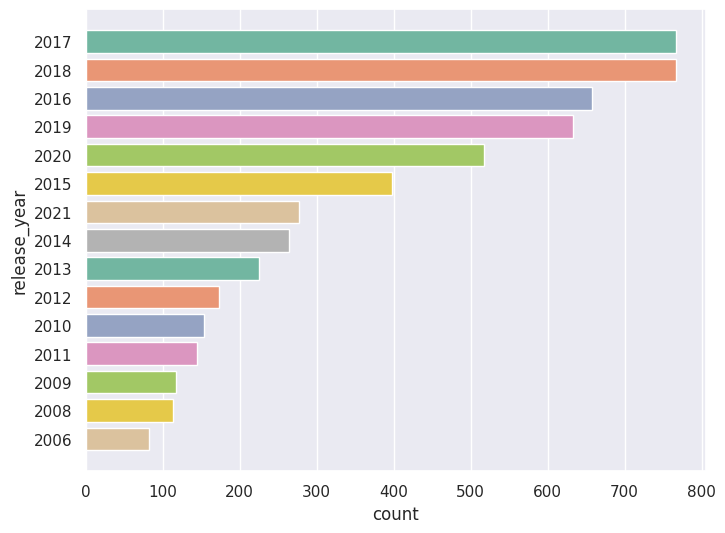

In [139]:
plt.figure(figsize=(8,6))

sns.set(style='darkgrid')
sns.countplot(y='release_year', data=netflix_movies, hue=netlfix_movies['release_year'], palette='Set2', order=netflix_movies['release_year'].value_counts().index[:15], legend=False)

plt.plot()

WordCloud for genres

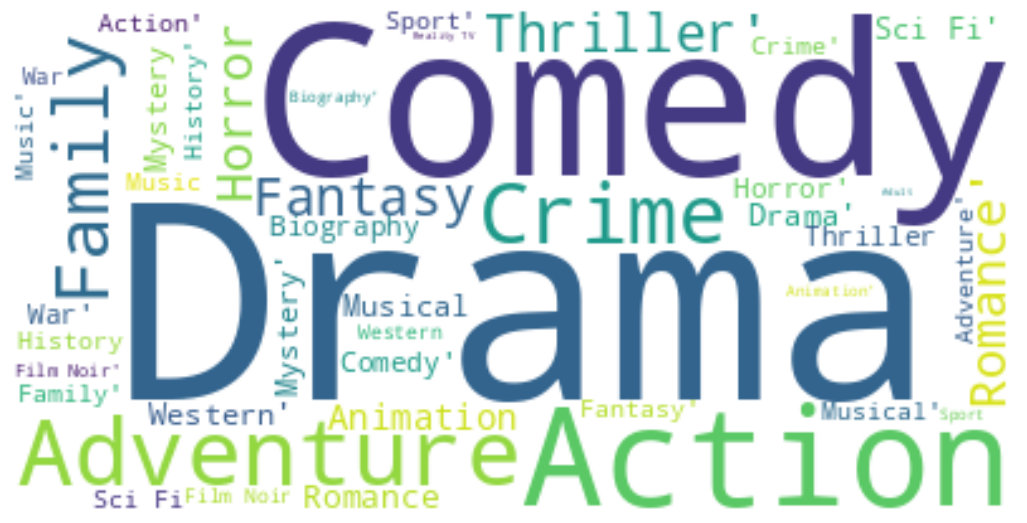

In [147]:
text = list(set(ratings['Genre']))
plt.rcParams['figure.figsize'] = (13, 13)

wordcloud = WordCloud(max_words=1000000,background_color="white").generate(str(text))

plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

In [153]:
from collections import Counter

genres=list(netflix_movies['listed_in'])
gen=[]

for i in genres:
    i=list(i.split(','))
    for j in i:
        gen.append(j.replace(' ',""))
g=Counter(gen)

<ipython-input-166-78689530dde0>:11: UserWarning:

FixedFormatter should only be used together with FixedLocator



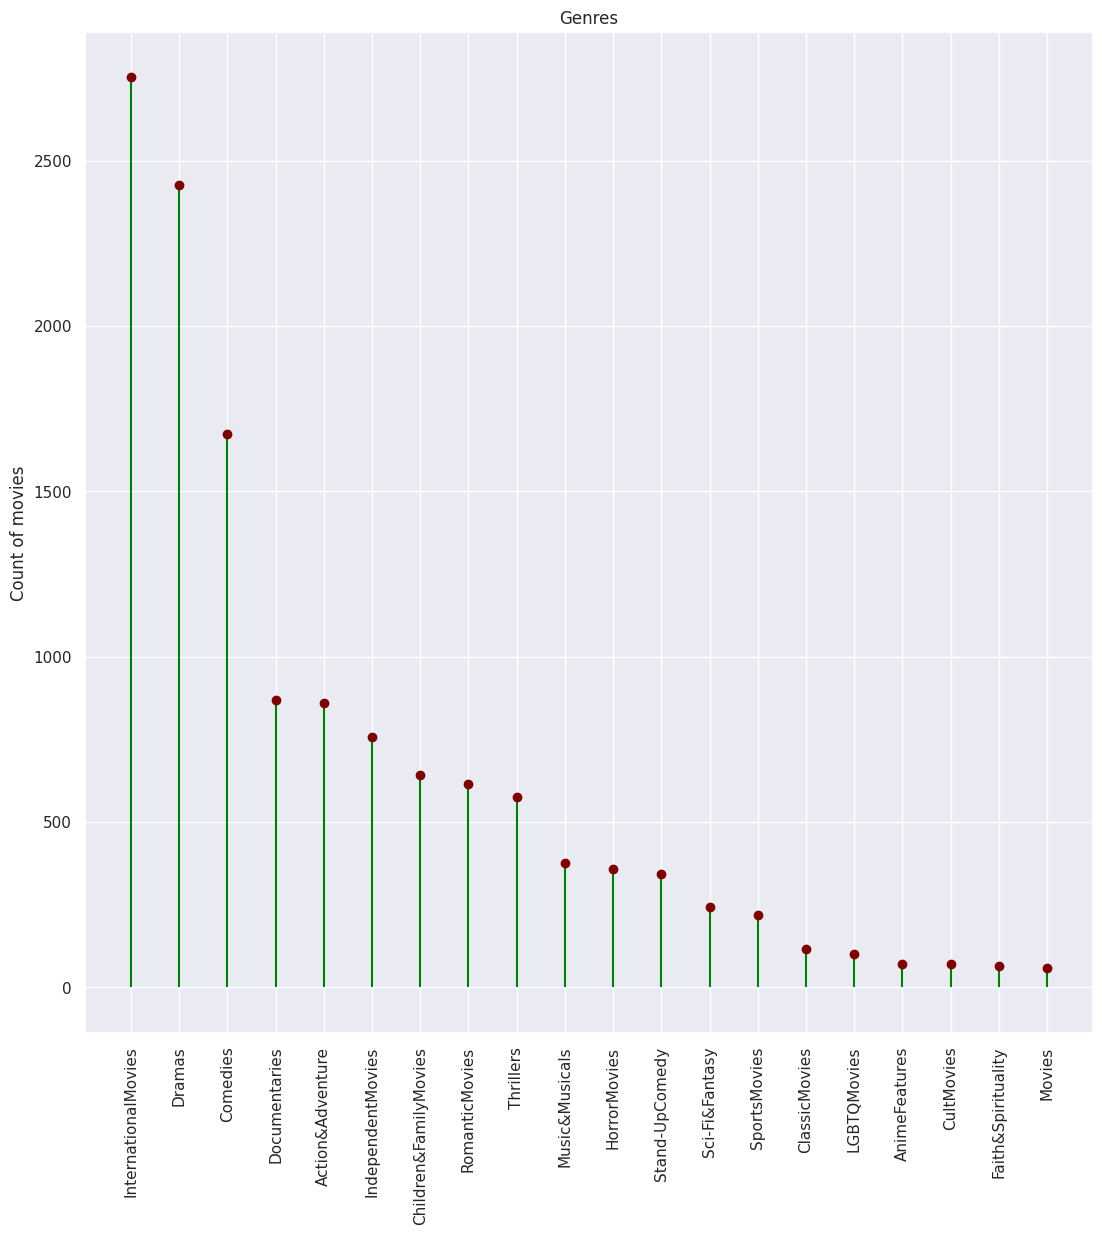

<Figure size 1000x1000 with 0 Axes>

In [166]:
g={k: v for k, v in sorted(g.items(), key=lambda item: item[1], reverse= True)}


fig, ax = plt.subplots()

fig = plt.figure(figsize = (10, 10))
x=list(g.keys())
y=list(g.values())
ax.vlines(x, ymin=0, ymax=y, color='green')
ax.plot(x,y, "o", color='maroon')
ax.set_xticklabels(x, rotation = 90)
ax.set_ylabel("Count of movies")
# set a title
ax.set_title("Genres");

plt.show()

In [160]:
features=['title','duration']
durations= netflix_shows[features]

durations['no_of_seasons']=durations['duration'].str.replace(' Season','')

#durations['no_of_seasons']=durations['no_of_seasons'].astype(str).astype(int)
durations['no_of_seasons']=durations['no_of_seasons'].str.replace('s','')

<ipython-input-160-dfedf649a3e0>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-160-dfedf649a3e0>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [161]:
durations['no_of_seasons']=durations['no_of_seasons'].astype(str).astype(int)

<ipython-input-161-ad93769c4198>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [162]:
t=['title','no_of_seasons']
top=durations[t]

top=top.sort_values(by='no_of_seasons', ascending=False)

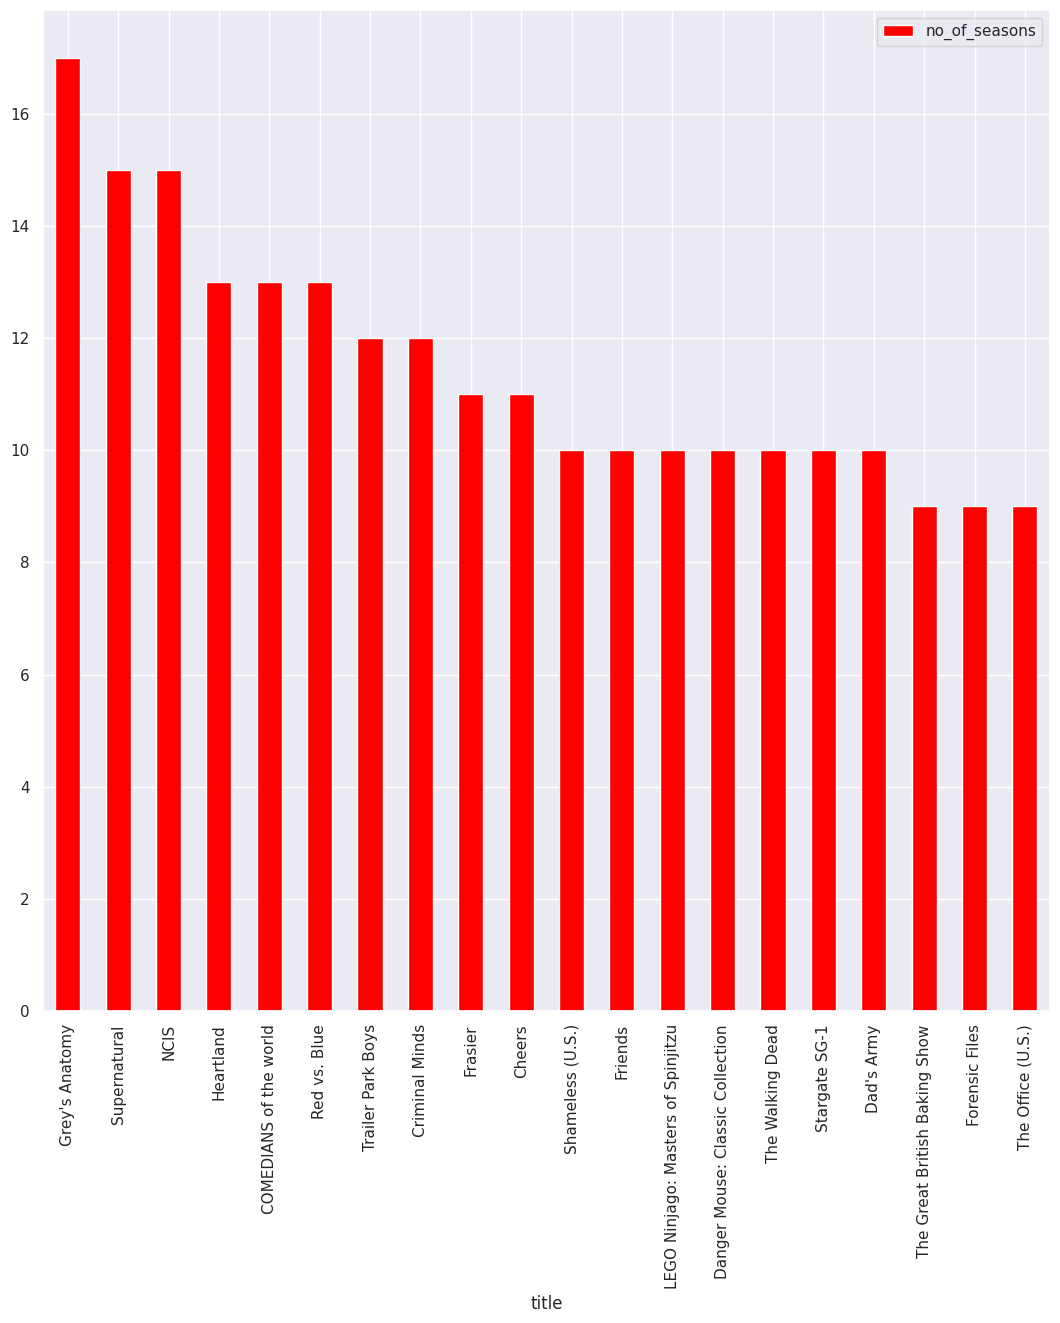

In [165]:
top20=top[0:20]
top20.plot(kind='bar',x='title',y='no_of_seasons', color='red')

plt.show()

Recommendation Sytem based on Content

In [168]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')

netflix['description'] = netflix['description'].fillna('')

matrix_tfidf = vectorizer.fit_transform(netflix['description'])

matrix_tfidf.shape

(8807, 18895)

In [169]:
from sklearn.metrics.pairwise import linear_kernel

cosine_sim = linear_kernel(matrix_tfidf, matrix_tfidf)

In [170]:
indices = pd.Series(netflix.index, index=netflix['title']).drop_duplicates()

In [182]:
def get_recommendations(title, cosine_sim=cosine_sim):
  idx = indices[title]

  sim_scores = list(enumerate(cosine_sim[idx]))

  sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
  sim_scores = sim_scores[1:11]

  movie_indices = [i[0] for i in sim_scores]

  return netflix['title'].iloc[movie_indices]

In [183]:
get_recommendations('Stranger Things')

4733               Rowdy Rathore
1240                  Safe Haven
1487             Sakho & Mangane
8198     The Autopsy of Jane Doe
2419               Big Stone Gap
6518            Come and Find Me
6760                   FirstBorn
8026             Sinister Circle
4201                 Hardy Bucks
1270    Sin senos sí hay paraíso
Name: title, dtype: object

In [186]:
get_recommendations('Peaky Blinders')

7683                    Our Godfather
2646                   My Stupid Boss
3133                              Don
8293                         The Fear
7140    Jonathan Strange & Mr Norrell
7785                Power Rangers Zeo
8467                       The Prison
8539                       The Tudors
1510                    The Con Is On
8391     The Legend of Michael Mishra
Name: title, dtype: object

Content Based filtering on multiple metrics

In [187]:
filledna=netflix.fillna('')

filledna.head(2)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [188]:
def clean_data(x):
  return str.lower(x.replace(' ', ''))

In [189]:
features = ['title','director','cast','listed_in','description']
filledna = filledna[features]

filledna

,title,director,cast,listed_in,description
0,Dick Johnson Is Dead,Kirsten Johnson,,Documentaries,"As her father nears the end of his life, filmm..."
1,Blood & Water,,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...","International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...","Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,Jailbirds New Orleans,,,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,Kota Factory,,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...","International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...
8802,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...","Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,Zombie Dumb,,,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...","Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...","Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [191]:
for feature in features:
  filledna[feature] = filledna[feature].apply(clean_data)

filledna.head(2)

,title,director,cast,listed_in,description
0,dickjohnsonisdead,kirstenjohnson,,documentaries,"asherfathernearstheendofhislife,filmmakerkirst..."
1,blood&water,,"amaqamata,khosingema,gailmabalane,thabangmolab...","internationaltvshows,tvdramas,tvmysteries","aftercrossingpathsataparty,acapetownteensetsou..."


In [192]:
def create_soup(x):
    return x['title']+ ' ' + x['director'] + ' ' + x['cast'] + ' ' +x['listed_in']+' '+ x['description']

In [193]:
filledna['soup'] = filledna.apply(create_soup, axis=1)

In [197]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(filledna['soup'])

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [198]:
filledna=filledna.reset_index()
indices = pd.Series(filledna.index, index=filledna['title'])

In [199]:
def get_recommendations_new(title, cosine_sim=cosine_sim):
    title=title.replace(' ','').lower()
    idx = indices[title]

    sim_scores = list(enumerate(cosine_sim[idx]))

    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    sim_scores = sim_scores[1:11]

    movie_indices = [i[0] for i in sim_scores]

    return netflix['title'].iloc[movie_indices]

In [201]:
get_recommendations_new('Peaky Blinders', cosine_sim2)

3034                    Giri / Haji
5032    The Frankenstein Chronicles
8431          The Murder Detectives
4951                         Loaded
4809                  Kiss Me First
6922                   Happy Valley
2184                       Get Even
519                   I AM A KILLER
3789                 Killer Ratings
4476          Terrorism Close Calls
Name: title, dtype: object

In [203]:
get_recommendations_new('Stranger Things', cosine_sim2)

5200                 Beyond Stranger Things
2190                   The Umbrella Academy
6953                                  Helix
3187                            Nightflyers
241                                Manifest
3707                           Motown Magic
8421                         The Messengers
2303                            Warrior Nun
1473         Chilling Adventures of Sabrina
8541    The Twilight Zone (Original Series)
Name: title, dtype: object